<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19**

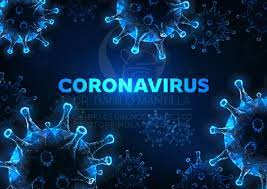


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [ ]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

En este paso vamos a cargar dos bases de datos:

Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en df_covid.

Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [ ]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [ ]:
df_covid.sample(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
21123,2022-08-07,IS,Iceland,EURO,803.0,200237,NaN,117
2971,2020-01-26,BS,Bahamas,AMRO,NaN,0,NaN,0
29030,2023-10-22,MQ,Martinique,NaN,NaN,230354,NaN,1104
22664,2023-09-10,IE,Ireland,EURO,801.0,1719497,21.0,9222
6052,2022-03-27,BR,Brazil,AMRO,229145.0,29802257,1768.0,658566


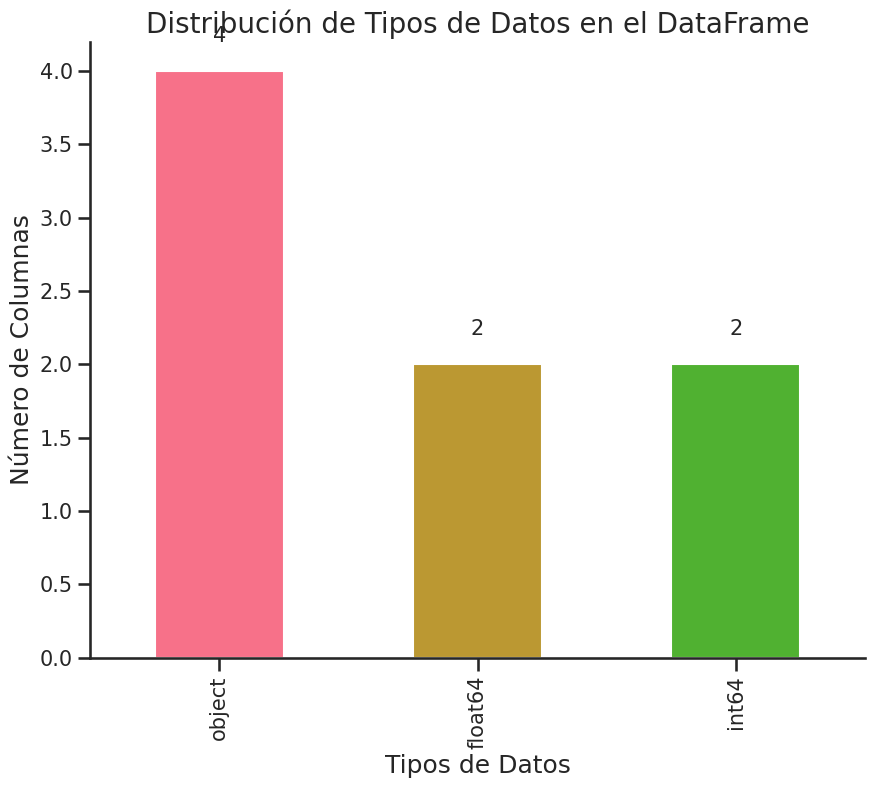

In [ ]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [ ]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [ ]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

Text(0, 0.5, 'Filas')

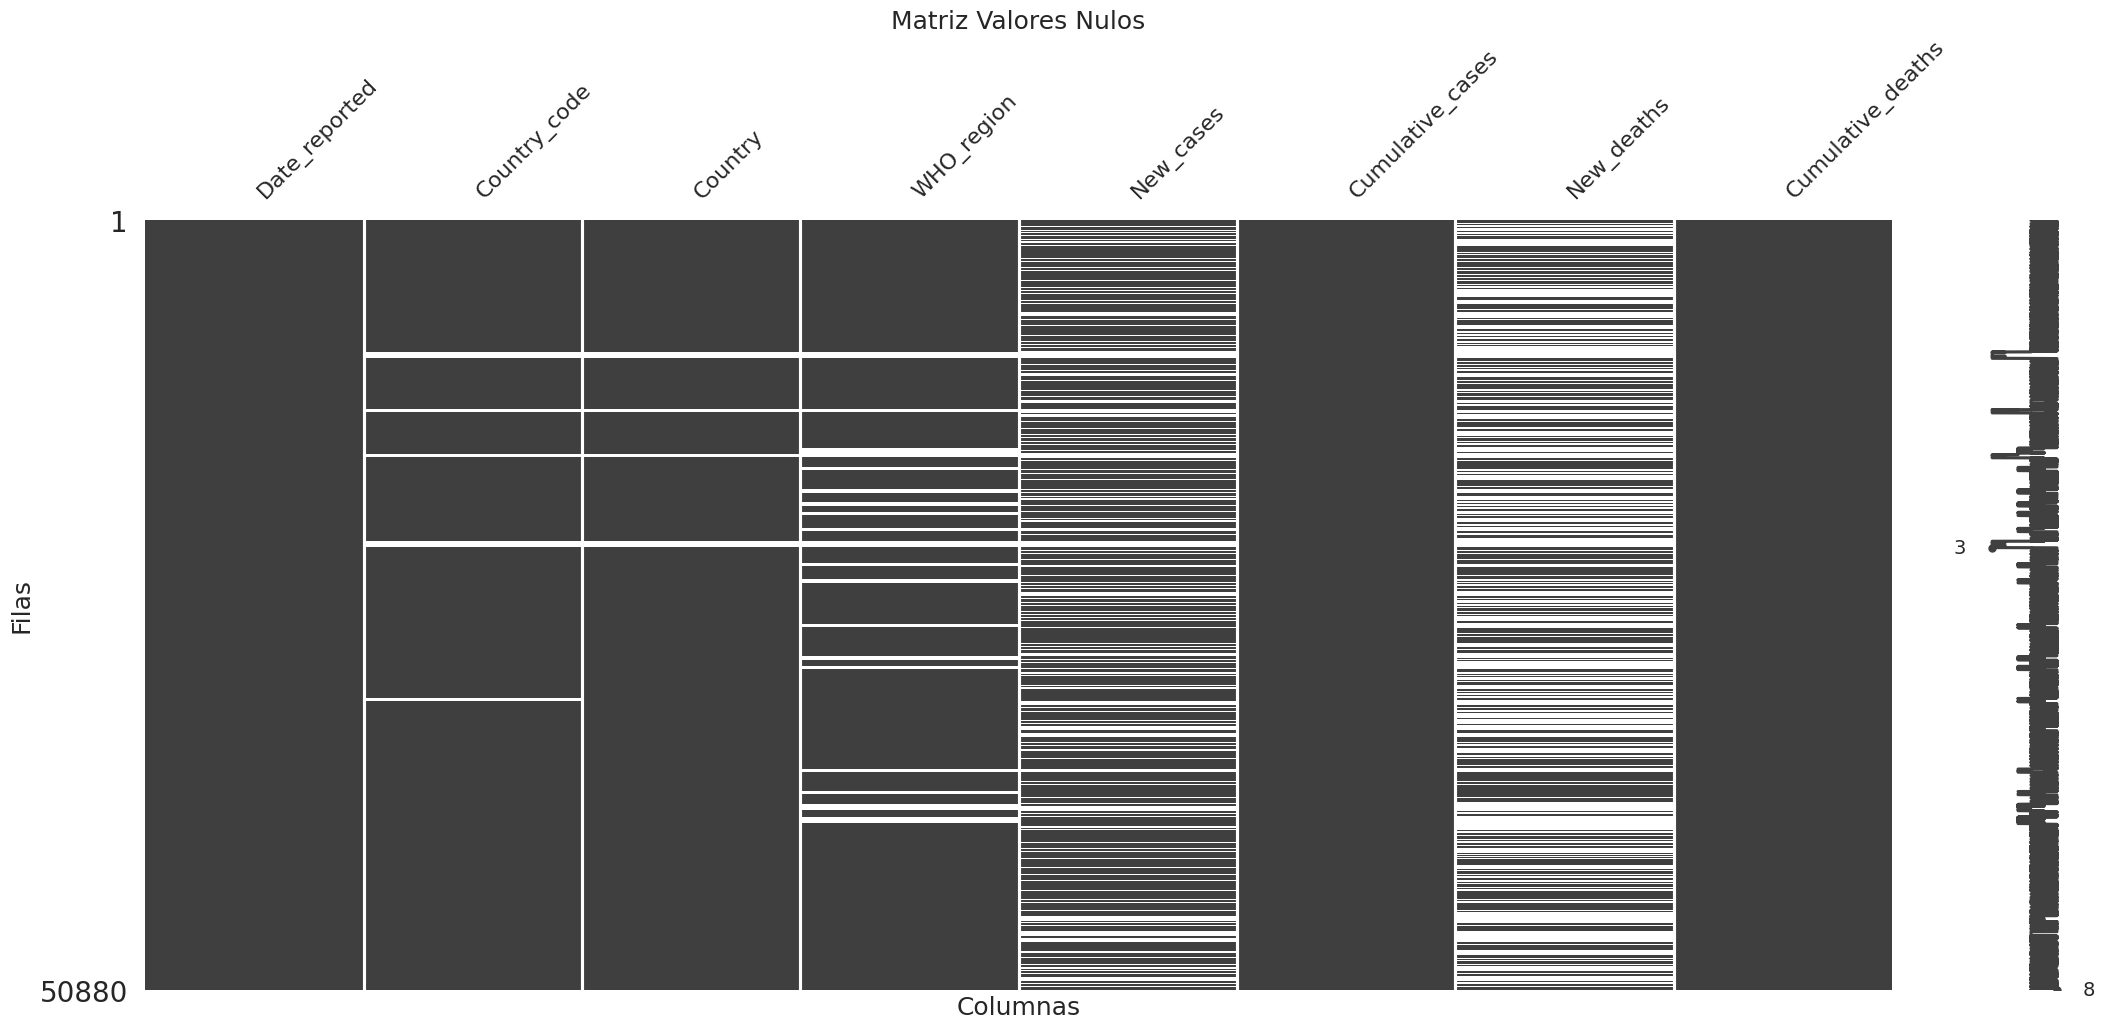

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [ ]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.662200e+04,5.088000e+04,24216.000000,5.088000e+04
mean,2.114490e+04,1.595994e+06,289.905434,1.873122e+04
std,2.794888e+05,7.172653e+06,1232.474473,7.800245e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.200000e+01,2.750000e+03,4.000000,2.100000e+01
50%,4.700000e+02,3.813600e+04,21.000000,4.115000e+02
75%,4.477750e+03,4.670500e+05,110.000000,6.066250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06


In [ ]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

<ipython-input-66-5abb5a8b81d0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.set_yticklabels(df_covid.corr(), rotation = 0)
<ipython-input-66-5abb5a8b81d0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.set_xticklabels(df_covid.corr())


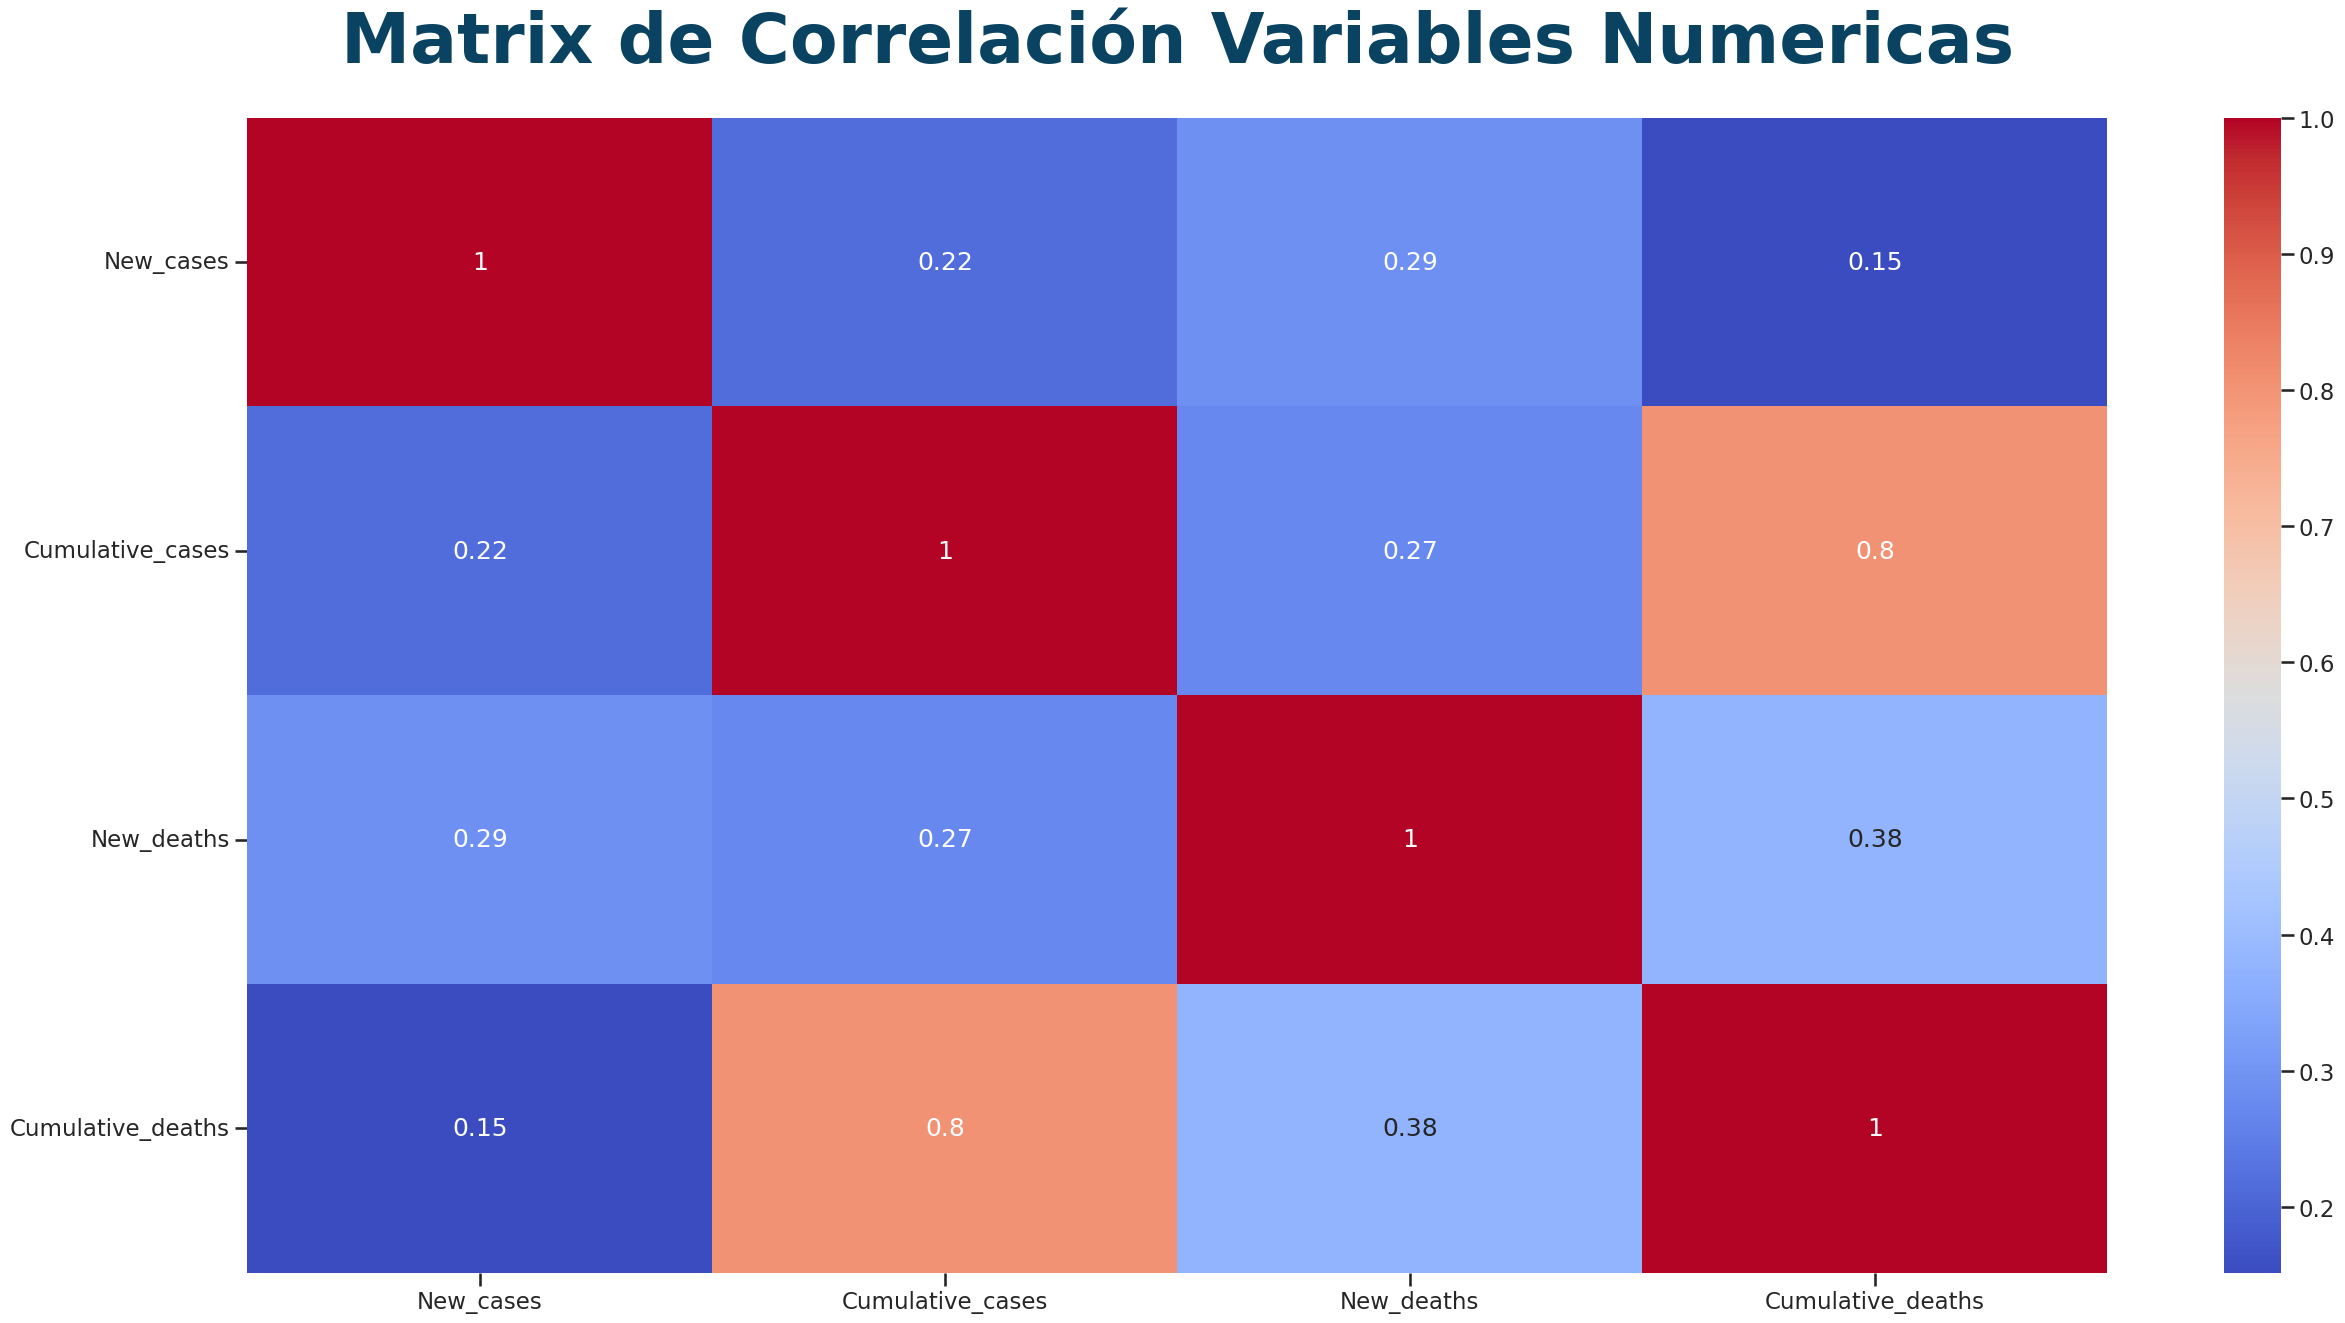

In [ ]:
#Correlación Entre Variables Numéricas
corr=df_covid.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_covid.corr(), rotation = 0)
ax.set_xticklabels(df_covid.corr())
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)
ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

4677     BM
43277    SS
9256     CL
20688    HN
22902    IL
Name: Country_code, dtype: object

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [ ]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0




1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [ ]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

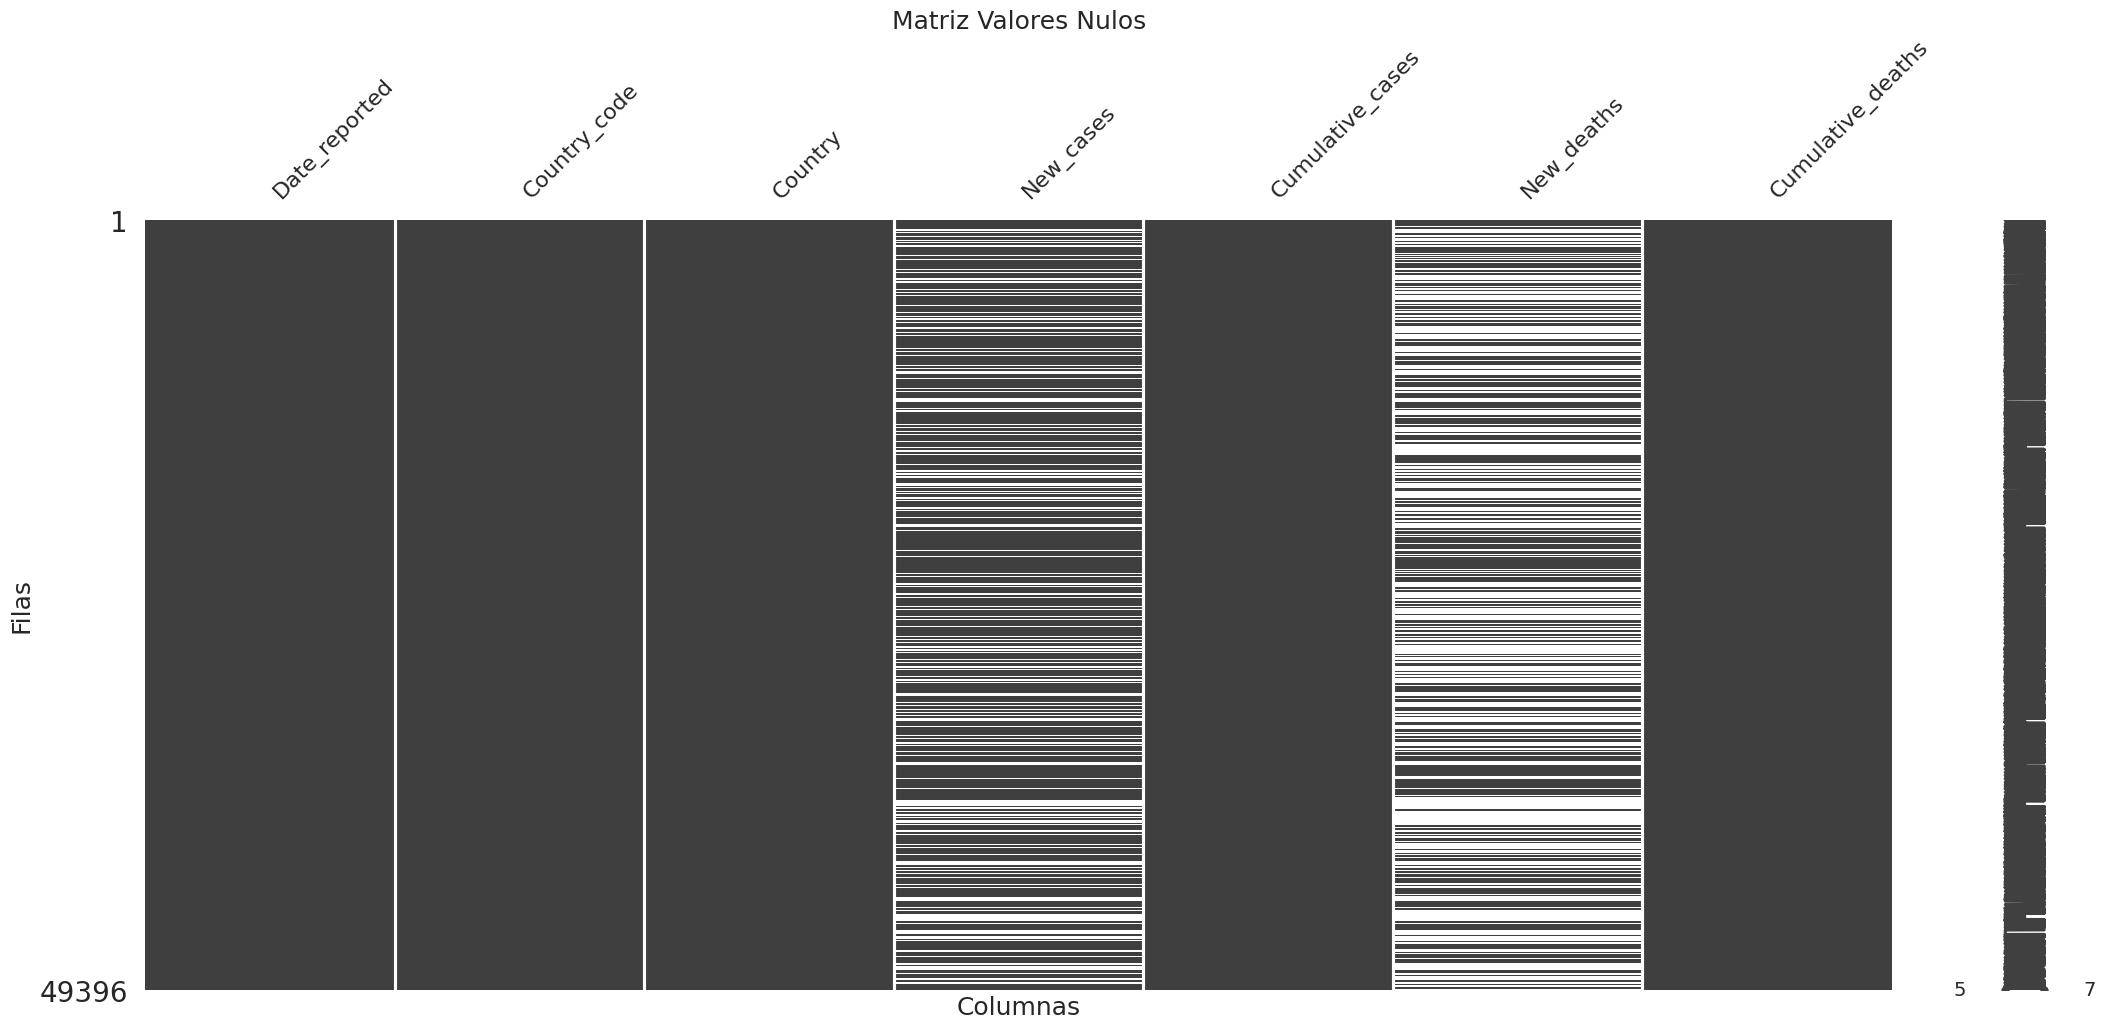

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [ ]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [ ]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.head()


Tipo de dato actual de Date_reported: datetime64[ns]
Tipo de dato después de la conversión: datetime64[ns]


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.

In [ ]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)


Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [ ]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
35930,2021-12-19,PE,Peru,10856,2261883,470,202120,8.935918
8484,2020-02-02,TD,Chad,0,0,0,0,NaN
39297,2021-06-27,LC,Saint Lucia,56,5262,4,84,1.596351
26006,2022-09-25,LB,Lebanon,1123,1214892,13,10670,0.878267
1072,2020-03-29,AO,Angola,0,0,0,0,NaN


Vamos a convertir en 0 los valores nulos en la columna lethality_rate

In [ ]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
44738,2020-02-16,SY,Syrian Arab Republic,0,0,0,0,0.000000
43563,2021-12-26,ES,Spain,491046,6100138,584,91275,1.496278
11634,2023-07-30,CY,Cyprus,0,660854,0,1364,0.206400
48926,2023-03-12,VI,United States Virgin Islands,33,24813,0,130,0.523919
25723,2021-05-16,LV,Latvia,4015,127976,66,2447,1.912077


Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [ ]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [ ]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
42016,2020-10-11,SX,Sint Maarten (Dutch part),31,699,0,22,3.147353
45957,2023-03-05,TG,Togo,17,39392,0,290,0.736190
28381,2023-07-23,ML,Mali,0,33151,0,743,2.241260
38197,2020-09-20,RU,Russian Federation,40588,1103399,840,19418,1.759835
16204,2021-10-10,FR,France,26346,6670348,191,118706,1.779607


In [ ]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
17505,2020-02-23,GD,Grenada,0,0,0,0,0.000000
16219,2023-10-15,GM,Gambia,0,12626,0,372,2.946301
28410,2023-05-14,MX,Mexico,7429,7608416,38,334126,4.391532
38164,2020-06-14,VC,Saint Vincent and the Grenadines,1,27,0,0,0.000000
22373,2020-11-08,JE,Jersey,76,644,0,32,4.968944
